<a href="https://colab.research.google.com/github/dlsun/Stat305-S20/blob/master/colabs/notebooks/STAT_305_Notebook_6_The_Maximum_Likelihood_Principle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I encourage you to work through this notebook with a partner so that you can discuss your answers. You should meet over an application such as Discord or Zoom. One person can share their screen with this notebook open.

In [ ]:
!pip install -q symbulate
from symbulate import *

import matplotlib.pyplot as plt

# Maximum Likelihood Principle

We have a skew die, and we want to know the probability $p$ that it lands on an ace. Suppose we roll it 45 times, and aces come up 10 times. What is our estimate of $p$, the probability of an ace?

Intuitively, the best estimate is $\hat p = 10 / 45 \approx .222$. Is there a way we could have come up with this estimate if we did not know it? 

We know that the number of aces $X$ follows a 
$ \text{Binomial}(n=45, p) $
distribution (assuming that the rolls are independent, of course). If we write down the p.m.f., there are two unknowns, $x$ and $p$:
$$ f_p(x) = \binom{45}{x} p^x (1 - p)^{n-x}. $$
Previously, we assumed a value of $p$ and used this formula to calculate the probability of $x$. 

What if we turned it around? In this case, we know that $X = 10$. What if we plugged in $10$ for $x$ and viewed the above formula as a function of $p$? This is once again an example of how statistics is the inverse of probability.

![](https://github.com/dlsun/Stat425F19/blob/master/notes/img/prob_stat.png?raw=1)

The following video explains how this works.

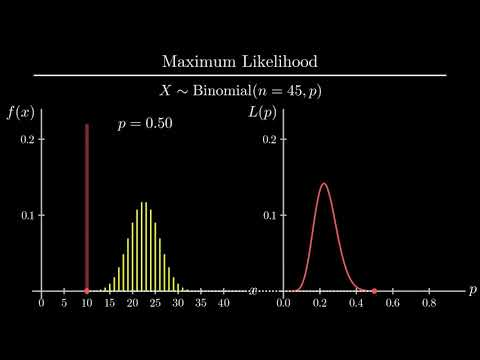

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("eI6ztPCmNYc", width=800, height=450)

The code below graphs the likelihood for $X = 10$, as a function of $p$. (Try modifying it to graph the likelihoods for $X = 14$ and $X = 6$.)

In [ ]:
ps = np.arange(0, 1, step=.01)

# You can define the likelihood manually.
def choose(n, k):
  return factorial(n) / (factorial(k) * factorial(n - k))

def likelihood(p):
  return (choose(45, 10) * 
          p ** 10 * 
          (1 - p) ** (45 - 10))

# Or you could use built-in distributions in Symbulate.
def likelihood(p):
  return Binomial(n=45, p=p).pmf(10)

plt.plot(ps, [likelihood(p) for p in ps], "-")

This likelihood is maximized somewhere between $0.20$ and $0.25$. To find out exactly where, we print out the value of the likelihood for all values of $p$ between $0.20$ and $0.25$, in increments of $0.001$.

In [ ]:
for p in np.arange(0.2, 0.25, step=0.001):
  print(round(p, 3), 
        likelihood(p))

The likelihood is maximized at $\hat p \approx 0.222$. If desired, we could obtain more digits of precision by zooming in on the region around $0.222$. This is the maximum likelihood estimate, and it coincides with the intuitive estimate of $\hat p = 10 / 45$.

## General Theory

The **likelihood** $L$ is the probability as a function of the parameter (e.g., $p, \mu, N$), which we denote by $\theta$ in general:
$$ L_{x}(\theta) \overset{\text{def}}{=} f_{\theta}(x). $$

To come up with an estimator of $\theta$, the **maximum likelihood principle** says that we should choose $\theta$ to maximize the likelihood. That is, the maximum likelihood estimate is 
$$ \hat\theta_{\text{ML}} = \underset{\theta}{\arg\max} L_x(\theta). $$

# Example 4. Spies and Agents



A team of 30 people consists of both agents and spies. Agents have a $2/3$ chance of succeeding on their mission; spies only have a $1/3$ chance of succeeding. The proportion of spies $s$ is unknown. Each of the 30 team members independently goes out on a mission, and 19 of the missions are successful. Based on this data, what is your estimate $\hat s$ of the proportion of spies?

**Question 1.** Write down the likelihood of $s$ when we observe 19 successful missions out of 30. 

(_Hint:_ First, calculate the overall probability of a successful mission in terms of $s$. Then, since missions are independent, the number of successful missions follows one of the named distributions we have learned.)

_YOUR ANSWER HERE_

$$ L_{x=19}(s) = ... $$

**Question 2.** Graph the likelihood (for 19 successful missions) as a function of $s$. What appears to be the MLE?

In [ ]:
# YOUR CODE HERE

_YOUR EXPLANATION HERE_

# Example 5. Capture-Recapture

Suppose that you want to estimate the number of fish in a lake; call this number $N$. In a technique known as capture-recapture, you first capture a random sample of fish, let's say 30 fish. You mark these 30 fish so they can be identified later and then release them back into the
lake. You allow them ample time to mingle thoroughly with the other fish, and then you capture another random sample of fish, let's say 20 fish. Then you count how many of the fish captured in the second sample are marked as having already been caught in the first sample. Let's say you observe that 7 of these 20 fish had already been caught the first time.

**Question 3.** Write down the p.m.f. of the number of fish that are tagged in the second sample. Leave your answer in terms of $N$ and $x$.

(_Hint:_ This distribution is one of the named distributions that we learned. Note that a fish cannot be caught twice in the same sample.)

_YOUR ANSWER HERE_

$$ f_N(x) = ... $$

**Question 4.** Graph the likelihood (for observing 7 tagged fish), as a function on $N$. Keep in mind that $N$ must be an integer. What is the MLE of $N$, the number of fish in the lake?

In [ ]:
# YOUR CODE HERE

_YOUR EXPLANATION HERE_

# Submission Instructions

1. [Go here](https://canvas.calpoly.edu/courses/25458/groups), and add you and your partner (if applicable) to one of the STAT 305 Groups.
2. Export this Colab notebook to PDF. Easiest way is File > Print > Save as PDF.
3. Double check that the PDF rendered properly (i.e., nothing is cut off).
4. Upload the PDF [to Canvas](https://canvas.calpoly.edu/courses/25458/assignments/111116). Only one of you needs to upload the PDF.